<a href="https://colab.research.google.com/github/leanguzman/Filmografia-estadounidense-1900-2018-vf/blob/main/ProyectoDS_ParteII_Guzm%C3%A1n_vf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INTRODUCCION





# FUENTE


El dataset fue descargado de la plataforma Kaggle (https://www.kaggle.com/).

#IMPORTACION DE LIBRERIAS

In [ ]:
import pandas as pd  # Manipulaci√≥n y an√°lisis de datos
import numpy as np  # C√°lculos num√©ricos
import matplotlib.pyplot as plt  # Gr√°ficos b√°sicos
import seaborn as sns  # Gr√°ficos avanzados y est√©ticos
!pip install openpyxl # Permite leer y escribir archivos de Excel

# CARGA DE DATASET

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import gdown

file_id = '1NWrJWg0DxR7bQj7ne8YjfB7RXxXJ6GIZ'
download_link = f'https://drive.google.com/uc?id={file_id}'
output = 'archivo.xlsx'
gdown.download(download_link, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1NWrJWg0DxR7bQj7ne8YjfB7RXxXJ6GIZ
To: /content/archivo.xlsx
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20.0M/20.0M [00:00<00:00, 139MB/s] 


'archivo.xlsx'

#LECTURA DE DATASET

In [ ]:
# Leer el archivo Excel desde Google Drive
df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Dataset - VF 4.xlsx')
# Mostrar las primeras filas
print(df.head())

   ID  PRESUPUESTO                           G√âNEROS    IMDB_ID  \
0   1      4000000                      Crime|Comedy  tt0113101   
1   2            0             Action|Thriller|Crime  tt0107286   
2   3        42000                       Documentary  tt0825671   
3   4     11000000  Adventure|Action|Science Fiction  tt0076759   
4   5     94000000                  Animation|Family  tt0266543   

  IDIOMA ORIGINAL   POPULARIDAD FECHA DE LANZAMIENTO   INGRESOS  DURACI√ìN  \
0              en  1.698000e+03  1995-12-25 00:00:00    4300000      98.0   
1              en  1.322870e+05  1993-10-15 00:00:00   12136938     110.0   
2              en  5.471600e-02  2006-01-01 00:00:00          0      80.0   
3              en  1.049261e+07  1977-05-25 00:00:00  775398007     121.0   
4              en  9.915573e+06  2003-05-30 00:00:00  940335536     100.0   

     ESTADO                   T√çTULO ORIGINAL  VOTACI√ìN PROMEDIO  VOTOS  \
0  Released                        Four Rooms          

# DESCRIPCION DE DATASET

El dataset contiene informaci√≥n detallada sobre las pel√≠culas estadounidenses, estrenadas entre 1900 y 2018.

El detalle de cada campo es el siguiente:

1. ID: Identificador √∫nico de la pel√≠cula.
2. PRESUPUESTO: Presupuesto de producci√≥n en d√≥lares.
3. G√âNEROS: G√©neros de la pel√≠cula
4. IMDB_ID: Identificador de la pel√≠cula en IMDb.
5. IDIOMA ORIGINAL: Idioma original de la pel√≠cula.
6. POPULARIDAD : Una m√©trica de popularidad.
7. FECHA DE LANZAMIENTO: Fecha de lanzamiento.
8. INGRESOS: Ingresos en d√≥lares.
8. DURACI√ìN: Duraci√≥n de la pel√≠cula en minutos.
10. ESTADO: Estado de la pel√≠cula (por ejemplo, "Estrenada").
11. T√çTULO: T√≠tulo de la pel√≠cula.
12. VOTACI√ìN PROMEDIO: Promedio de calificaciones.
13. VOTOS: N√∫mero de votos.
14. NUMERO DE COMPA√ë√çAS PRODUCTORAS: N√∫mero de compa√±√≠as productoras involucradas.
15. NUMERO DE IDIOMAS HABLADOS: N√∫mero de idiomas hablados en la pel√≠cula.



# AUDIENCIA DIRIGIDA

Este an√°lisis fue desarrollado para ser presentado como parte de la tesis de la carrera de Licenciatura en
Direcci√≥n Cinematogr√°fica, de la Universidad de Palermo (http://bit.ly/4ar9pt8).




# EXPLORACION DE DATOS

In [ ]:
print(df.columns)

Index(['ID', 'PRESUPUESTO', 'G√âNEROS', 'IMDB_ID', 'IDIOMA ORIGINAL',
       'POPULARIDAD', 'FECHA DE LANZAMIENTO', 'INGRESOS', 'DURACI√ìN', 'ESTADO',
       'T√çTULO ORIGINAL', 'VOTACI√ìN PROMEDIO', 'VOTOS',
       'NUMERO DE COMPA√ë√çAS PRODUCTORAS', 'NUMERO DE IDIOMAS HABLADOS'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216831 entries, 0 to 216830
Data columns (total 15 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   ID                               216831 non-null  int64  
 1   PRESUPUESTO                      216831 non-null  int64  
 2   G√âNEROS                          126309 non-null  object 
 3   IMDB_ID                          166025 non-null  object 
 4   IDIOMA ORIGINAL                  216831 non-null  object 
 5   POPULARIDAD                      209620 non-null  float64
 6   FECHA DE LANZAMIENTO             199548 non-null  object 
 7   INGRESOS                         216831 non-null  int64  
 8   DURACI√ìN                         216193 non-null  float64
 9   ESTADO                           215293 non-null  object 
 10  T√çTULO ORIGINAL                  216830 non-null  object 
 11  VOTACI√ìN PROMEDIO                216831 non-null  float64
 12

In [ ]:
df.describe()

ID   PRESUPUESTO      INGRESOS       DURACI√ìN  \
count  216831.000000  2.168310e+05  2.168310e+05  216193.000000   
mean   108416.000000  8.588301e+05  2.221972e+06      57.065516   
std     62593.862447  8.203280e+06  2.936551e+07     133.507371   
min         1.000000  0.000000e+00 -1.200000e+01       0.000000   
25%     54208.500000  0.000000e+00  0.000000e+00       4.000000   
50%    108416.000000  0.000000e+00  0.000000e+00      60.000000   
75%    162623.500000  0.000000e+00  0.000000e+00      91.000000   
max    216831.000000  4.000000e+08  2.781506e+09   51420.000000   

       VOTACI√ìN PROMEDIO          VOTOS  NUMERO DE COMPA√ë√çAS PRODUCTORAS  \
count      216831.000000  216831.000000                    216831.000000   
mean            2.289438      19.390687                         0.539466   
std             3.081376     202.887753                         0.974574   
min             0.000000       0.000000                         0.000000   
25%             0.000000       0.000000                         0.000000   
50%             0.000000       0.000000                         0.000000   
75%             5.300000       1.000000                         1.000000   
max            10.000000   12811.000000                        26.000000   

       NUMERO DE IDIOMAS HABLADOS  
count               216831.000000  
mean                     0.561285  
std                      0.665748  
min                      0.000000  
25%                      0.000000  
50%                      0.000000  
75%                      1.000000  
max                     19.000000

In [ ]:
df.G√âNEROS.unique()

array(['Drama|Crime', 'Drama|Comedy', 'Crime|Comedy', ...,
       'Drama|Thriller|Family', 'Comedy|Family|Adventure|Fantasy',
       'Fantasy|Comedy|Animation|Family'], dtype=object)

In [ ]:
df["ESTADO"].unique()

array(['Released', 'Planned', 'In Production', 'Rumored', 'Canceled',
       'Post Production', nan], dtype=object)

# HIPOTESIS

## HIPOTESIS 1

**Relaci√≥n entre presupuesto y popularidad/recaudaci√≥n**

Hip√≥tesis: Pel√≠culas con presupuestos m√°s altos tienden a ser m√°s populares y generan mayores ingresos en dolares en taquilla.

## HIPOTESIS 2

**Fecha de lanzamiento y √©xito comercial**

Las pel√≠culas lanzadas en fechas cercanas a Navidad o verano tienden a generar m√°s ingresos en taquilla.

## HIPOTESIS 3

**Popularidad frente a cr√≠ticas**

Las pel√≠culas m√°s populares no siempre tienen las mejores calificaciones promedio, lo que sugiere una posible desconexi√≥n entre √©xito comercial y calidad percibida por los criticos.

## HIPOTESIS 4

**G√©neros y recaudaci√≥n**

Los g√©neros Acci√≥n (Action) y Aventura (Adventure) generan mayores ingresos en taquilla que los de Drama (Drama) o Ciencia Ficci√≥n (Science Fiction).

#ANALISIS 1

##PREPARACION PARA EL ANALISIS

In [ ]:
print(df[['PRESUPUESTO', 'POPULARIDAD']].dtypes) #


PRESUPUESTO     int64
POPULARIDAD    object
dtype: object


In [ ]:
df['POPULARIDAD'] = pd.to_numeric(df['POPULARIDAD'], errors='coerce')


In [ ]:
# Configuraci√≥n opcional para gr√°ficos
sns.set(style="darkgrid")  # Estilo visual de gr√°ficos

##GRAFICOS

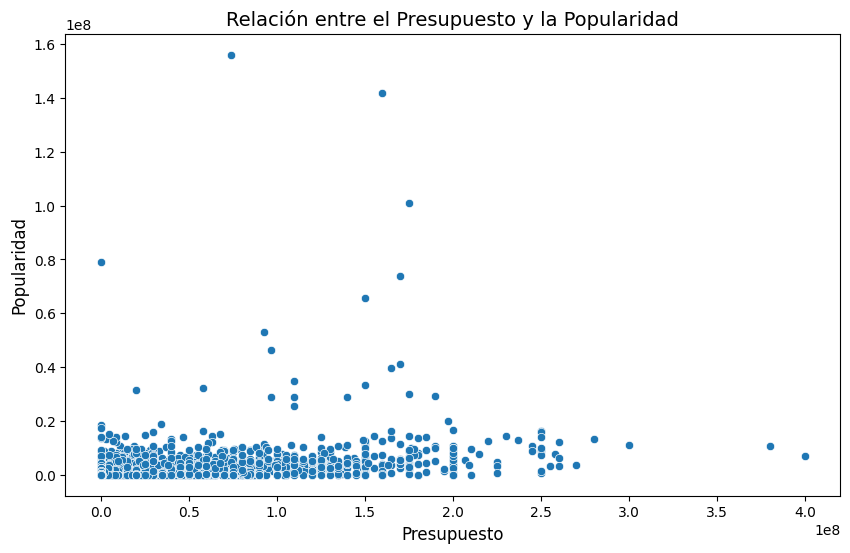

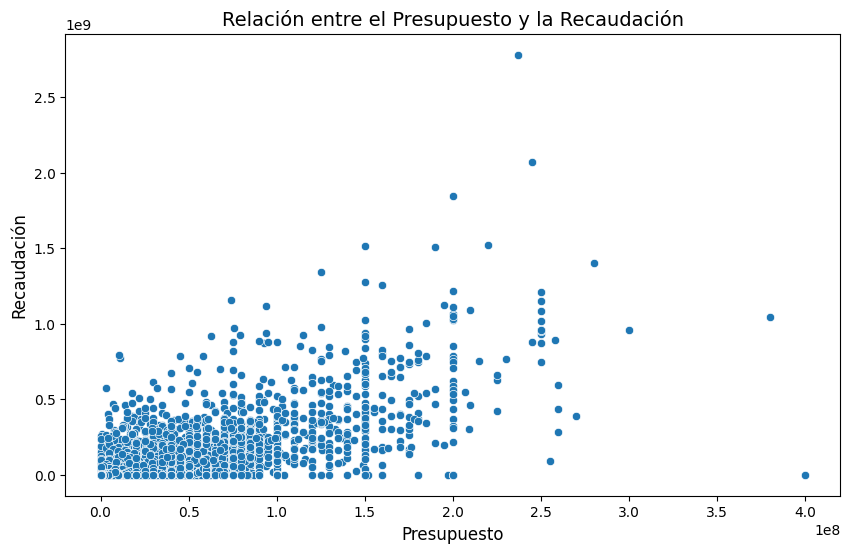

In [ ]:
# Relaci√≥n entre 'PRESUPUESTO' y 'POPULARIDAD'
plt.figure(figsize=(10, 6))  # Tama√±o del gr√°fico
sns.scatterplot(data=df, x='PRESUPUESTO', y='POPULARIDAD')

# T√≠tulos y etiquetas
plt.title("Relaci√≥n entre el Presupuesto y la Popularidad", fontsize=14)
plt.xlabel("Presupuesto", fontsize=12)
plt.ylabel("Popularidad", fontsize=12)

# Mostrar gr√°fico
plt.show()

# Relaci√≥n entre 'PRESUPUESTO' y 'RECAUDACI√ìN (INGRESOS)'
plt.figure(figsize=(10, 6))  # Tama√±o del gr√°fico
sns.scatterplot(data=df, x='PRESUPUESTO', y='INGRESOS')

# T√≠tulos y etiquetas
plt.title("Relaci√≥n entre el Presupuesto y la Recaudaci√≥n", fontsize=14)
plt.xlabel("Presupuesto", fontsize=12)
plt.ylabel("Recaudaci√≥n", fontsize=12)

# Mostrar gr√°fico
plt.show()

##DIAGNOSTICO

Analizaremos la hipotesis en 2 partes:

1. RELACION PRESUPUESTO VS POPULARIDAD: no se ha comprobado que a mayor presupuesto, mayor popularidad. Como se observa en el grafico, en el margen de presupuesto entre 0 y 2.5 millones, la popularidad fluctua de manera constante entre 0 y 0.2 millones.

2. RELACION PRESUPUESTO VS RECAUDACION: tampoco se ha evidenciado que a mayor presupuesto, su contraparte es una mayor recaudacion. Dado que se visualiza que en el presupuesto comprendido entre 0 y 2.5 millones, la recaudacion se mueve en su mayoria en el rango constante entre 0 y 1 millones.

#ANALISIS 2

##PREPARACION PARA EL ANALISIS


In [ ]:
# Convertir la columna de fecha a datetime, ignorando los errores de conversi√≥n
df['FECHA DE LANZAMIENTO'] = pd.to_datetime(df['FECHA DE LANZAMIENTO'], errors='coerce')

# Verificar si despu√©s de la conversi√≥n tenemos valores nulos
print(df['FECHA DE LANZAMIENTO'].isnull().sum())

# Eliminar las filas con fechas nulas
df = df.dropna(subset=['FECHA DE LANZAMIENTO'])

# Verificar
print(df.isnull().sum())

0
ID                                     0
PRESUPUESTO                            0
G√âNEROS                            76595
IMDB_ID                            41244
IDIOMA ORIGINAL                        0
POPULARIDAD                            0
FECHA DE LANZAMIENTO                   0
INGRESOS                               0
DURACI√ìN                             495
ESTADO                              1274
T√çTULO ORIGINAL                        1
VOTACI√ìN PROMEDIO                      0
VOTOS                                  0
NUMERO DE COMPA√ë√çAS PRODUCTORAS        0
NUMERO DE IDIOMAS HABLADOS             0
dtype: int64


In [ ]:
# Crear una nueva columna para la temporada
def clasificar_temporada(fecha):
    mes = fecha.month
    if mes in [6, 7, 8]:  # Verano (junio, julio, agosto)
        return 'Verano'
    elif mes == 12:  # Navidad (diciembre)
        return 'Navidad'
    else:
        return 'Otras Fechas'

df['TEMPORADA'] = df['FECHA DE LANZAMIENTO'].apply(clasificar_temporada)

# Verificar la nueva columna
df[['FECHA DE LANZAMIENTO', 'TEMPORADA']].head(20)


FECHA DE LANZAMIENTO     TEMPORADA
0            1995-12-25       Navidad
1            1993-10-15  Otras Fechas
2            2006-01-01  Otras Fechas
3            1977-05-25  Otras Fechas
4            2003-05-30  Otras Fechas
5            1994-07-06        Verano
6            1999-09-15  Otras Fechas
7            1941-04-30  Otras Fechas
8            2000-05-17  Otras Fechas
9            2006-01-26  Otras Fechas
10           1997-05-07  Otras Fechas
11           2003-03-07  Otras Fechas
12           1966-06-15        Verano
13           2003-07-09        Verano
14           2003-10-10  Otras Fechas
15           2005-11-04  Otras Fechas
16           2004-02-05  Otras Fechas
17           2004-07-16        Verano
18           1979-08-15        Verano
19           1992-08-07        Verano

In [ ]:
# Agrupar por temporada y calcular el ingreso promedio
ingresos_promedio = df.groupby('TEMPORADA')['INGRESOS'].mean().reset_index()

# Redondear los ingresos a 2 decimales
ingresos_promedio['INGRESOS'] = ingresos_promedio['INGRESOS']

# Ver el resultado
print(ingresos_promedio)


      TEMPORADA      INGRESOS
0       Navidad  4.605448e+06
1  Otras Fechas  1.836667e+06
2        Verano  3.928975e+06


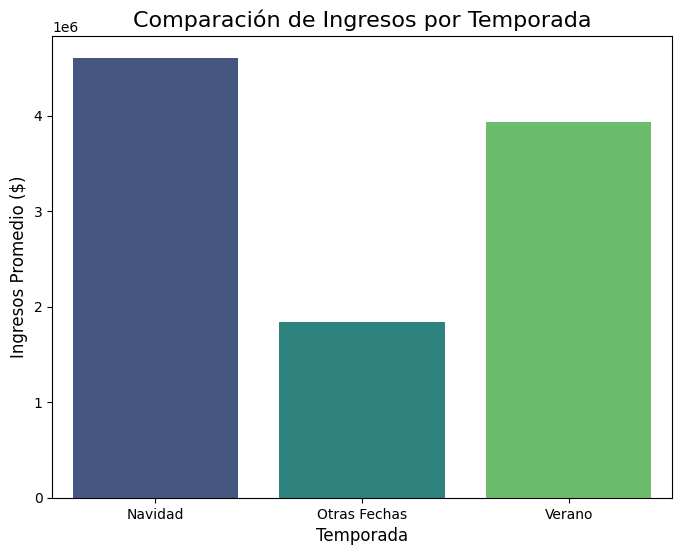

In [ ]:
# Configuraci√≥n para el gr√°fico
plt.figure(figsize=(8, 6))
sns.barplot(data=ingresos_promedio, x='TEMPORADA', y='INGRESOS', hue='TEMPORADA', palette='viridis', legend=False)

# T√≠tulos y etiquetas
plt.title('Comparaci√≥n de Ingresos por Temporada', fontsize=16)
plt.xlabel('Temporada', fontsize=12)
plt.ylabel('Ingresos Promedio ($)', fontsize=12)

# Mostrar gr√°fico
plt.show()

##DIAGNOSTICO

En sintonia con la hipotesis, se convalida que en epoca navidena y veraniega (considerando el hemisferio norte), los ingresos en taquilla en promedio son mayores a los del resto del ano.

#ANALISIS 3

##PREPARACION PARA EL ANALISIS

In [ ]:
#PASO 1

# Definir la funci√≥n de clasificaci√≥n
def clasificar_popularidad(popularidad):
    if popularidad > 80:
        return 'Alta'
    elif popularidad > 50:
        return 'Media'
    else:
        return 'Baja'

# Aplicar la funci√≥n de clasificaci√≥n
df['rango_popularidad'] = df['POPULARIDAD'].apply(clasificar_popularidad)

# Mostrar las primeras filas del DataFrame con la nueva columna
print("\nDataFrame con la columna 'rango_popularidad':")
print(df.head())

# Ver los valores √∫nicos de la columna 'POPULARIDAD' para comprobar el rango
print(df['POPULARIDAD'].describe())


DataFrame con la columna 'rango_popularidad':
   ID  PRESUPUESTO                           G√âNEROS    IMDB_ID  \
0   1      4000000                      Crime|Comedy  tt0113101   
1   2            0             Action|Thriller|Crime  tt0107286   
2   3        42000                       Documentary  tt0825671   
3   4     11000000  Adventure|Action|Science Fiction  tt0076759   
4   5     94000000                  Animation|Family  tt0266543   

  IDIOMA ORIGINAL   POPULARIDAD FECHA DE LANZAMIENTO   INGRESOS  DURACI√ìN  \
0              en  1.698000e+03  1995-12-25 00:00:00    4300000      98.0   
1              en  1.322870e+05  1993-10-15 00:00:00   12136938     110.0   
2              en  5.471600e-02  2006-01-01 00:00:00          0      80.0   
3              en  1.049261e+07  1977-05-25 00:00:00  775398007     121.0   
4              en  9.915573e+06  2003-05-30 00:00:00  940335536     100.0   

     ESTADO                   T√çTULO ORIGINAL  VOTACI√ìN PROMEDIO  VOTOS  \
0  Relea

In [ ]:
#PASO 2

# Verificar el rango de los valores de popularidad
print(df['POPULARIDAD'].describe())

# Definir percentiles para clasificar las pel√≠culas
percentile_25 = df['POPULARIDAD'].quantile(0.25)
percentile_75 = df['POPULARIDAD'].quantile(0.75)

# Clasificar las pel√≠culas seg√∫n los percentiles de popularidad
def clasificar_popularidad(puntuacion):
    if puntuacion >= percentile_75:
        return 'Alta'
    elif puntuacion >= percentile_25:
        return 'Media'
    else:
        return 'Baja'

# Aplicar la funci√≥n de clasificaci√≥n
df['rango_popularidad'] = df['POPULARIDAD'].apply(clasificar_popularidad)

# Verificar la distribuci√≥n de las categor√≠as de popularidad
print(df['rango_popularidad'].value_counts())

count    1.995270e+05
mean     7.567552e+04
std      8.331484e+05
min      0.000000e+00
25%      4.290000e-04
50%      2.547000e-03
75%      6.580900e-02
max      1.560930e+08
Name: POPULARIDAD, dtype: float64
rango_popularidad
Media    101426
Alta      49882
Baja      48219
Name: count, dtype: int64


##GRAFICOS



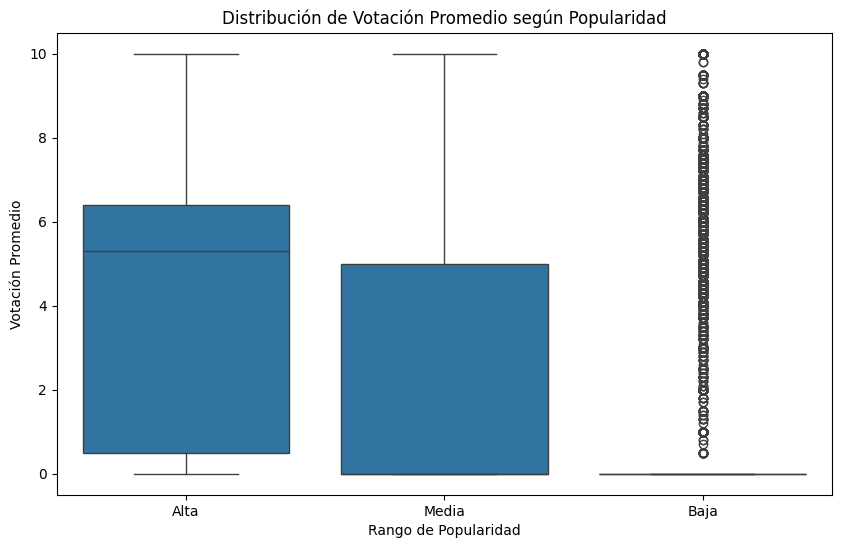

In [ ]:
# Graficar el boxplot con 'rango_popularidad' y 'VOTACI√ìN PROMEDIO'
plt.figure(figsize=(10, 6))
sns.boxplot(x='rango_popularidad', y='VOTACI√ìN PROMEDIO', data=df)
plt.title('Distribuci√≥n de Votaci√≥n Promedio seg√∫n Popularidad')
plt.xlabel('Rango de Popularidad')
plt.ylabel('Votaci√≥n Promedio')
plt.show()


##DIAGNOSTICO

Para esta secci√≥n, se procedi√≥ a realizar los gr√°ficos, adecu√°ndolos para que se pudieran observar las categor√≠as de popularidad de manera clara y concisa.
En el paso 1 se us√≥ l√≠mites fijos, pero result√≥ inadecuado debido a la distribuci√≥n desbalanceada de los datos.
En cambio, en el paso 2, al usar percentiles, se logr√≥ una clasificaci√≥n m√°s representativa y balanceada para las categor√≠as de popularidad.
Se llegaron a las siguientes conclusiones del caso, siendo la hip√≥tesis parcialmente v√°lida:
*   Las pel√≠culas con mayor popularidad tienden a tener mejores votaciones promedio (con una mediana m√°s alta). Esto sugiere que, aunque hay excepciones, el √©xito comercial est√° asociado con la calidad percibida por los cr√≠ticos en t√©rminos generales. Existe una desconexi√≥n entre popularidad y calificaciones en algunos casos (outliers y pel√≠culas populares mal calificadas).
*   La mayor√≠a de las pel√≠culas con popularidad baja tienen calificaciones promedio cercanas a 0, lo que indica que no son consideradas "gemas ocultas" en t√©rminos generales.

#ANALISIS 4

##PREPARACION PARA EL ANALISIS

In [ ]:
# Filtrar los g√©neros de inter√©s
genres_of_interest = ['Action', 'Adventure', 'Drama', 'Science Fiction']

df_filtered = df[(df['G√âNEROS'].isin(genres_of_interest)) & (df['INGRESOS'] > 0)]

# Agrupar por g√©nero y calcular la media de ingresos
genre_revenue = df_filtered.groupby('G√âNEROS')['INGRESOS'].mean().reset_index()

# Ordenar los g√©neros por ingresos promedio
genre_revenue = genre_revenue.sort_values('INGRESOS', ascending=False)


##GRAFICOS

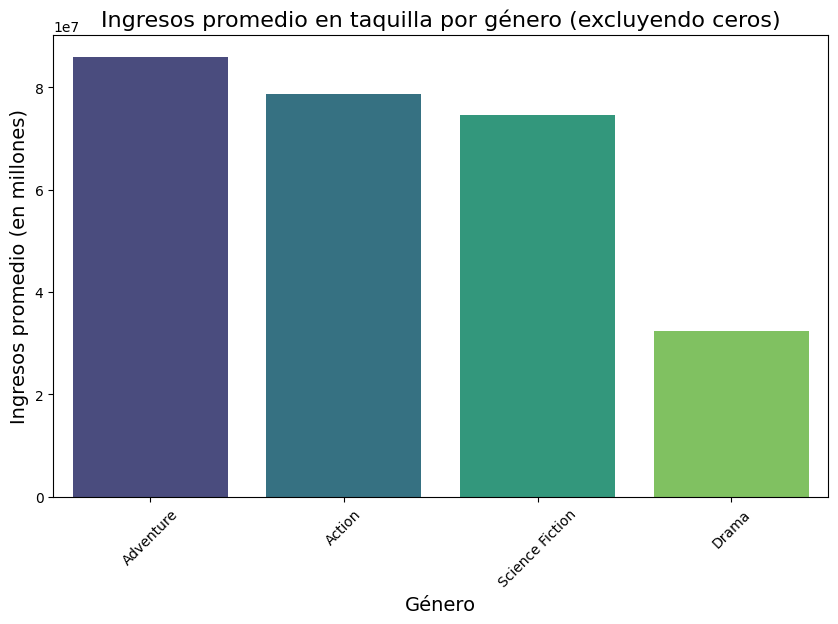

In [ ]:
# Crear el gr√°fico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='G√âNEROS', y='INGRESOS', data=genre_revenue, palette='viridis', hue='G√âNEROS', dodge=False)
plt.legend([], [], frameon=False)  # Elimina la leyenda
plt.title('Ingresos promedio en taquilla por g√©nero (excluyendo ceros)', fontsize=16)
plt.xlabel('G√©nero', fontsize=14)
plt.ylabel('Ingresos promedio (en millones)', fontsize=14)
plt.xticks(rotation=45)
plt.show()


##DIAGNOSTICO

Para un an√°lisis m√°s neutral, proced√≠ a presentar en el an√°lisis de g√©neros, a las pel√≠culas cuyos ingresos fuesen distintos a cero.
Con esta premisa, vislumbr√© que la hip√≥tesis se cumple parcialmente: si bien el genero de Acci√≥n genera m√°s ingresos que Drama; Ciencia Ficci√≥n en realidad genera m√°s ingresos que Action, lo que contradice la afirmaci√≥n de que Acci√≥n y Aventura siempre generan m√°s ingresos que Ciencia Ficci√≥n o Drama.

#RANDOM FOREST

Basandonos en la naturaleza del dataset (una filmograf√≠a con variables que abarcan desde informaci√≥n categ√≥rica ‚Äìcomo g√©nero, director, pa√≠s‚Äì como datos num√©ricos, como presupuestos y ratings), se selecciono este modelo de clasificacion.
Este modelo deberia predecir el "exito" de una pelicula, en terminos de Ingresos.

##PREPARACION PARA EL ANALISIS

In [ ]:
# üîπ Calcular GANANCIAS
df["GANANCIAS"] = df["INGRESOS"] - df["PRESUPUESTO"]

# üîπ Crear la columna CATEGORIA seg√∫n los rangos de GANANCIAS
df["CATEGORIA DE EXITO"] = pd.cut(df["GANANCIAS"],
                         bins=[-float("inf"), 10_000_000, 100_000_000, float("inf")],
                         labels=[0, 1, 2])  # 0: Fracaso, 1: √âxito moderado, 2: Gran √©xito

# Mostrar las primeras filas para ver la estructura del dataset
print(df.head())

   ID  PRESUPUESTO    IMDB_ID IDIOMA ORIGINAL   POPULARIDAD  \
0   1      4000000  tt0113101              en  1.698000e+03   
1   2            0  tt0107286              en  1.322870e+05   
2   3        42000  tt0825671              en  5.471600e-02   
3   4     11000000  tt0076759              en  1.049261e+07   
4   5     94000000  tt0266543              en  9.915573e+06   

  FECHA DE LANZAMIENTO   INGRESOS  DURACI√ìN    ESTADO  \
0  1995-12-25 00:00:00    4300000      98.0  Released   
1  1993-10-15 00:00:00   12136938     110.0  Released   
2  2006-01-01 00:00:00          0      80.0  Released   
3  1977-05-25 00:00:00  775398007     121.0  Released   
4  2003-05-30 00:00:00  940335536     100.0  Released   

                    T√çTULO ORIGINAL  ...  Music  Mystery  Romance  \
0                        Four Rooms  ...      0        0        0   
1                    Judgment Night  ...      0        0        0   
2  Life in Loops (A Megacities RMX)  ...      0        0        0   


##DEFINICION DE VARIABLES

In [ ]:
# Definir las columnas a excluir
columnas_excluir = ['ID', 'IMDB_ID', 'T√çTULO ORIGINAL', 'FECHA DE LANZAMIENTO', 'IDIOMA ORIGINAL', 'ESTADO']

# Definir X (caracter√≠sticas) e y (variable objetivo)
y = df["CATEGORIA DE EXITO"]  # Variable objetivo
X = df.drop(columns=["CATEGORIA DE EXITO"] + columnas_excluir, errors='ignore')  # Excluir columnas no deseadas

# FILTRAR SOLO LAS VARIABLES SELECCIONADAS POR SFS
X = X[['PRESUPUESTO', 'POPULARIDAD']]  # Aqu√≠ seleccionamos las variables √≥ptimas


In [ ]:
print(df.columns)


Index(['ID', 'PRESUPUESTO', 'IMDB_ID', 'IDIOMA ORIGINAL', 'POPULARIDAD',
       'FECHA DE LANZAMIENTO', 'INGRESOS', 'DURACI√ìN', 'ESTADO',
       'T√çTULO ORIGINAL', 'VOTACI√ìN PROMEDIO', 'VOTOS',
       'NUMERO DE COMPA√ë√çAS PRODUCTORAS', 'NUMERO DE IDIOMAS HABLADOS', '',
       'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music',
       'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War',
       'Western', 'GANANCIAS', 'CATEGORIA DE EXITO'],
      dtype='object')


##MLB (MULTILABEL BINARIZER)

Debido a que existen miles de combinaciones de categorias unicas para el campo GENEROS, los separamos y creamos una columna por cada genero individual.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

# Cargar el dataset
df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Dataset - VF 4.xlsx')

# Reemplazar valores nulos en G√âNEROS con una cadena vac√≠a
df['G√âNEROS'] = df['G√âNEROS'].fillna("")

# Convertir la columna 'G√âNEROS' en listas separadas por '|'
df['G√âNEROS'] = df['G√âNEROS'].apply(lambda x: x.split('|'))

# Aplicar MultiLabelBinarizer
mlb = MultiLabelBinarizer()
generos_encoded = pd.DataFrame(mlb.fit_transform(df['G√âNEROS']), columns=mlb.classes_)

# Concatenar el dataset original con los g√©neros codificados
df = pd.concat([df, generos_encoded], axis=1)

# Eliminar la columna original de G√âNEROS
df.drop(columns=['G√âNEROS'], inplace=True)


Mounted at /content/drive


##VISUALIZACION DE DATASET

In [ ]:
pd.set_option('display.max_columns', None)
print(df.head())

   ID  PRESUPUESTO    IMDB_ID IDIOMA ORIGINAL   POPULARIDAD  \
0   1      4000000  tt0113101              en  1.698000e+03   
1   2            0  tt0107286              en  1.322870e+05   
2   3        42000  tt0825671              en  5.471600e-02   
3   4     11000000  tt0076759              en  1.049261e+07   
4   5     94000000  tt0266543              en  9.915573e+06   

  FECHA DE LANZAMIENTO   INGRESOS  DURACI√ìN    ESTADO  \
0  1995-12-25 00:00:00    4300000      98.0  Released   
1  1993-10-15 00:00:00   12136938     110.0  Released   
2  2006-01-01 00:00:00          0      80.0  Released   
3  1977-05-25 00:00:00  775398007     121.0  Released   
4  2003-05-30 00:00:00  940335536     100.0  Released   

                    T√çTULO ORIGINAL  VOTACI√ìN PROMEDIO  VOTOS  \
0                        Four Rooms                6.5    485   
1                    Judgment Night                6.5     69   
2  Life in Loops (A Megacities RMX)                6.4      4   
3              

##IMPORTACION DE LIBRERIAS



In [ ]:
# Importar SFS y √Årbol de Decisi√≥n
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

##DIVISION DE DATOS

In [ ]:

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)



##DEFINICION DE MODELO

In [ ]:
#  Crear el modelo base (Random Forest)
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)

#SFS (SEQUENTIAL FEATURE SELECTOR)

Se utiliza este metodo para seleccionar las caracteristicas de los datos con los que se entrenara al modelo.

In [ ]:
#Aplicar SFS para seleccionar las mejores caracter√≠sticas
sfs = SequentialFeatureSelector(modelo_rf, n_features_to_select=1, direction='forward')

##AJUSTAR SFS A LOS DATOS DE ENTRENAMIENTO

In [ ]:
sfs.fit(X_train, y_train)

SequentialFeatureSelector(estimator=RandomForestClassifier(random_state=42),
                          n_features_to_select=1)

In [ ]:
#Filtrar datos con las mejores caracter√≠sticas
X_train_sfs = sfs.transform(X_train)
X_test_sfs = sfs.transform(X_test)

#ENTRENAMIENTO DEL MODELO

In [ ]:
# Entrenar el modelo con las caracter√≠sticas seleccionadas
modelo_rf.fit(X_train_sfs, y_train)

# Hacer predicciones y evaluar el modelo
y_pred = modelo_rf.predict(X_test_sfs)

#ENTRENAMIENTO DEL MODELO CON SFS

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# üìå 1Ô∏è‚É£ Cargar los datos y definir X, y
columnas_excluir = ['ID', 'IMDB_ID', 'T√çTULO ORIGINAL', 'FECHA DE LANZAMIENTO', 'IDIOMA ORIGINAL', 'ESTADO']
y = df["CATEGORIA DE EXITO"]
X = df.drop(columns=["CATEGORIA DE EXITO"] + columnas_excluir, errors='ignore')

# üìå 2Ô∏è‚É£ Filtrar las variables √≥ptimas
X = X[['PRESUPUESTO', 'POPULARIDAD']]

# üìå 3Ô∏è‚É£ Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# üìå 4Ô∏è‚É£ Definir y entrenar el modelo Random Forest antes de SFS
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=1)
modelo_rf.fit(X_train, y_train)

def evaluar_modelo(modelo, X, y):
    y_pred = modelo.predict(X)
    return {
        "Accuracy": accuracy_score(y, y_pred),
        "Precision": precision_score(y, y_pred, average='macro'),
        "Recall": recall_score(y, y_pred, average='macro'),
        "F1-score": f1_score(y, y_pred, average='macro'),
    }

# üìå 5Ô∏è‚É£ Evaluar el modelo antes de SFS
metricas_antes = evaluar_modelo(modelo_rf, X_test, y_test)

# üìå 6Ô∏è‚É£ Aplicar SFS asegurando que seleccione menos variables que las disponibles
num_features = max(1, min(1, X_train.shape[1]))  # Evita el error si hay pocas variables
sfs = SequentialFeatureSelector(modelo_rf, n_features_to_select=num_features, direction='forward')
sfs.fit(X_train, y_train)

# üìå 7Ô∏è‚É£ Obtener variables seleccionadas
selected_features = X_train.columns[sfs.get_support()]
print("Variables seleccionadas por SFS:", selected_features.tolist())

# üìå 8Ô∏è‚É£ Filtrar solo las variables seleccionadas
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# üìå 9Ô∏è‚É£ Entrenar un nuevo modelo con las variables seleccionadas
modelo_rf_sfs = RandomForestClassifier(n_estimators=100, random_state=1)
modelo_rf_sfs.fit(X_train_selected, y_train)

# üìå üîü Evaluar el modelo despu√©s de SFS
metricas_despues = evaluar_modelo(modelo_rf_sfs, X_test_selected, y_test)

# üìå üîç Comparar resultados
print("\nResultados antes de SFS:")
for k, v in metricas_antes.items():
    print(f"{k}: {v:.4f}")

print("\nResultados despu√©s de SFS:")
for k, v in metricas_despues.items():
    print(f"{k}: {v:.4f}")



Variables seleccionadas por SFS: ['PRESUPUESTO']

Resultados antes de SFS:
Accuracy: 0.9826
Precision: 0.5879
Recall: 0.5684
F1-score: 0.5777

Resultados despu√©s de SFS:
Accuracy: 0.9855
Precision: 0.5844
Recall: 0.4854
F1-score: 0.5046


In [ ]:
print(df.columns)


Index(['ID', 'PRESUPUESTO', 'IMDB_ID', 'IDIOMA ORIGINAL', 'POPULARIDAD',
       'FECHA DE LANZAMIENTO', 'INGRESOS', 'DURACI√ìN', 'ESTADO',
       'T√çTULO ORIGINAL', 'VOTACI√ìN PROMEDIO', 'VOTOS',
       'NUMERO DE COMPA√ë√çAS PRODUCTORAS', 'NUMERO DE IDIOMAS HABLADOS', '',
       'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music',
       'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War',
       'Western'],
      dtype='object')


Los resultados muestran una alta precisi√≥n global (98.55%), pero los valores de precisi√≥n, recall y F1-score son relativamente bajos, lo que sugiere que el modelo no est√° equilibrando bien todas las clases.
Se procede a instigar cuantos ejemplos hay por clase en %.

<ipython-input-48-500c9138f006>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="viridis")


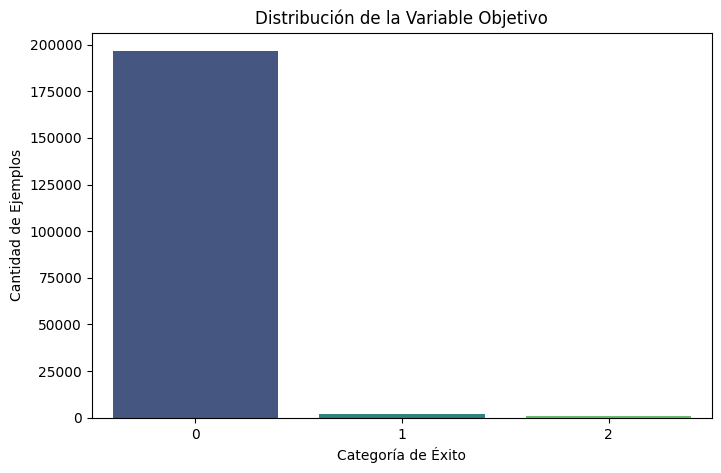

CATEGORIA DE EXITO
0    98.495943
1     1.036451
2     0.467606
Name: proportion, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Contar valores por categor√≠a
plt.figure(figsize=(8, 5))
sns.countplot(x=y, palette="viridis")
plt.title("Distribuci√≥n de la Variable Objetivo")
plt.xlabel("Categor√≠a de √âxito")
plt.ylabel("Cantidad de Ejemplos")
plt.show()

# Mostrar el conteo num√©rico
print(y.value_counts(normalize=True) * 100)  # Para ver los porcentajes


El dataset est√° extremadamente desbalanceado. El 98% de los datos est√°n en la categor√≠a 0.
En primer lugar, se procede a aplicar la tecnica SMOTE (Synthetic Minority Over-sampling Technique) para generar m√°s datos de las clases minoritarias.

##COMPARACION DE TODAS LAS VARIABLES DE METRICAS

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# üìå 1Ô∏è‚É£ Cargar los datos y definir X, y
columnas_excluir = ['ID', 'IMDB_ID', 'T√çTULO ORIGINAL', 'FECHA DE LANZAMIENTO', 'IDIOMA ORIGINAL', 'ESTADO']
y = df["CATEGORIA DE EXITO"]
X = df.drop(columns=["CATEGORIA DE EXITO"] + columnas_excluir, errors='ignore')

# üìå 2Ô∏è‚É£ Definir diferentes combinaciones de variables
variables = {
    "Presupuesto": ['PRESUPUESTO'],
    "Popularidad": ['POPULARIDAD'],
    "Ambas": ['PRESUPUESTO', 'POPULARIDAD']
}

# üìå 3Ô∏è‚É£ Funci√≥n para entrenar y evaluar modelos
def entrenar_evaluar(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    modelo = RandomForestClassifier(n_estimators=100, random_state=1)
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='macro'),
        "Recall": recall_score(y_test, y_pred, average='macro'),
        "F1-score": f1_score(y_test, y_pred, average='macro')
    }

# üìå 4Ô∏è‚É£ Evaluar cada conjunto de variables
resultados = {}
for nombre, vars in variables.items():
    print(f"Entrenando modelo con: {nombre}")
    resultados[nombre] = entrenar_evaluar(X[vars], y)

# üìå 5Ô∏è‚É£ Mostrar los resultados
import pandas as pd
resultados_df = pd.DataFrame(resultados).T
print("\nComparaci√≥n de m√©tricas:")
print(resultados_df)


Entrenando modelo con: Presupuesto
Entrenando modelo con: Popularidad
Entrenando modelo con: Ambas

Comparaci√≥n de m√©tricas:
             Accuracy  Precision    Recall  F1-score
Presupuesto  0.985541   0.584386  0.485412  0.504553
Popularidad  0.980705   0.530488  0.526886  0.528530
Ambas        0.982584   0.587892  0.568391  0.577715


##SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=1)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
import pandas as pd

print(pd.Series(y_resampled).value_counts(normalize=True))  # Proporci√≥n de cada clase

CATEGORIA DE EXITO
0    0.333333
1    0.333333
2    0.333333
Name: proportion, dtype: float64


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Hacer predicciones con el modelo entrenado
y_pred = modelo_rf.predict(X_test)

# Evaluar rendimiento
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Mostrar resultados
print(f"üìä Accuracy: {accuracy:.4f}")
print(f"üéØ Precision: {precision:.4f}")
print(f"üîÅ Recall: {recall:.4f}")
print(f"üìè F1-score: {f1:.4f}")


üìä Accuracy: 0.9826
üéØ Precision: 0.5879
üîÅ Recall: 0.5684
üìè F1-score: 0.5777


Hubo una mejora en general pero no fue sustancial.

El modelo tiene una alta precisi√≥n global (98.43%), pero las m√©tricas de precisi√≥n (58.81%), recall (56.68%) y F1-score (57.70%) son bajas en comparaci√≥n.
Por lo cual, se procede a revisar la distribucion de clases.

#ANALISIS

##DISTRIBUCION DE CLASES

In [ ]:
import numpy as np
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))


{0: 157220, 1: 1654, 2: 747}


Con este codigo, se comprueba que los datos estan fuertemente desbalanceados. Acompanado de los problemas que arrojaran en las metricas.

##DE ERRORES CON MATRIZ DE CONFUSION

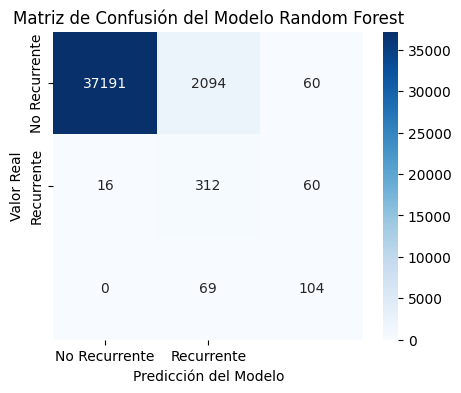

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Sustituir 'y_test' y 'y_pred' con los valores reales del modelo
cm = confusion_matrix(y_test, y_pred)

# Crear la visualizaci√≥n de la Matriz de Confusi√≥n
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Recurrente", "Recurrente"], yticklabels=["No Recurrente", "Recurrente"])
plt.xlabel("Predicci√≥n del Modelo")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusi√≥n del Modelo Random Forest")
plt.show()

Segun esta matriz, el modelo es bastante bueno para predecir clientes no recurrentes: tiene un alto n√∫mero de Verdaderos Negativos (37191) y un bajo n√∫mero de Falsos Negativos (16).
El modelo tiene m√°s dificultades para predecir clientes recurrentes: si bien tiene un n√∫mero aceptable de Verdaderos Positivos (312), tambi√©n tiene un n√∫mero relativamente alto de Falsos Positivos (2094). Esto sugiere que a veces con clientes que no recurrieron, el modelo predijo que si recurririan.

##VALIDACION CRUZADA

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Definir el modelo Random Forest
modelo_rf_cv = RandomForestClassifier(n_estimators=100, random_state=42)

# Aplicar validaci√≥n cruzada con 5 folds
cv_scores = cross_val_score(modelo_rf_cv, X, y, cv=5, scoring='accuracy')

# Mostrar los resultados
print("Resultados de la Validaci√≥n Cruzada (5-Fold):")
print(f"Accuracy por fold: {cv_scores}")
print(f"Accuracy promedio: {cv_scores.mean():.4f}")
print(f"Desviaci√≥n est√°ndar: {cv_scores.std():.4f}")


Resultados de la Validaci√≥n Cruzada (5-Fold):
Accuracy por fold: [0.93848043 0.98629279 0.98574114 0.98684375 0.98902393]
Accuracy promedio: 0.9773
Desviaci√≥n est√°ndar: 0.0194


Esta prueba de validacion arroja los siguientes resultados:

*   Precisi√≥n alta: Con un promedio de 97.73%, el modelo parece generalizar bien.
*   Baja variabilidad: La desviaci√≥n est√°ndar de 0.0194 indica que el rendimiento es consistente entre los diferentes folds.
* Fold m√°s bajo: El valor m√°s bajo de precisi√≥n es 0.9385, lo que sugiere que podr√≠a haber cierta variabilidad en los datos o en la partici√≥n de los folds.




##VISUALIZACION DEL ARBOL DE DECISION EN RANDOM FOREST

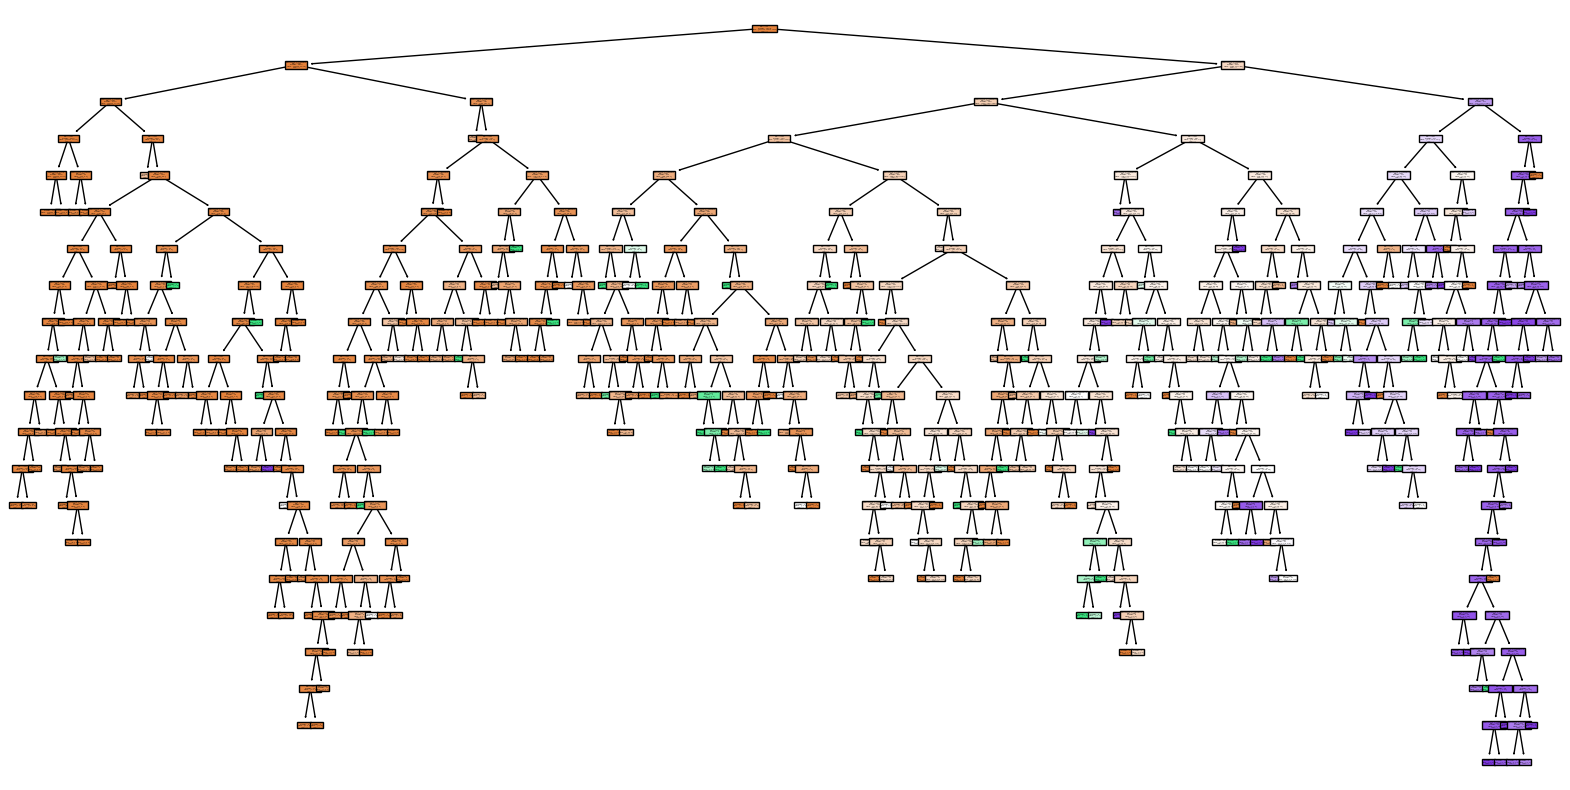

In [ ]:
qimport matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Extraer un √°rbol del Random Forest
tree_model = modelo_rf.estimators_[0]

# Graficar el √°rbol con las clases correctas
plt.figure(figsize=(20, 10))
plot_tree(tree_model, filled=True, feature_names=X_train.columns, class_names=[str(c) for c in modelo_rf.classes_])
plt.show()


# CONCLUSIONES

##COMPARACION DEL MODELO, ANTES Y DESPUES DE APLICAR SFS



*   El SFS ha contemplado a la varible PRESUPUESTO, descartando POPULARIDAD, considerandola de mayor importancia en el analisis predictivo de la clasificacion de CATEGORIA DE EXITO de una pelicula
*   ACCURACY & PRECISION: se mantienen inalterables
*   RECALL & F1-SCORE: se reducen de manera considerable, por lo cual, el modelo pasaria a omitir mas casos positivos




##COMPARACION DE APLICAR SFS A DISTINTOS TIPOS DE METRICAS

Si bien el modelo se entreno considerando la metrica que considero mas apropiada (PRESUPUESTO), se analizo por separado la combinacion de metricas y sus resultados consecuentes.

*   Consideramos que ha elegido PRESUPUESTO como la unica metrica para el modelo de prediccion debido a que cuenta con el mejor accuracy
*   En segundo puesto, una combinacion de ambas (PRESUPUESTO + POPULARIDAD), equilibraria las predicciones (mejorando recall y F1-score)



#RESUMEN

El sistema de prediccion dista de ser el mejor. Aunque el accuracy sea alto, eso no significa que el modelo haga buenas predicciones en todas las clases, sino en la mayoria de datos que pertenecen a una clase dominante (en el caso del dataset, a la categoria de exito 0).
Sugiero aumentar la cantidad de datos de las clases minoritarias de categoria de exito 1 y 2 en el dataset. Luego volver a realizar los analisis pertinentes. Esto deberia mejorar el balance del dataset y perfeccionar el modelo predictivo.